In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('search_clustering_alzheimers-disease.csv')
# feature engineering & extraction

data = data.filter(items=['pubmed_id', 'title', 'abstract', 'copyrights', 'publication_date', 'authors', 'keywords', 'journal', 'conclusions', 'methods', 'results', 'Rank', 'Total Cites', 'Journal Impact Factor', 'Eigenfactor Score', 'published_year', 'published_month'])
data = data.dropna(subset=['Journal Impact Factor'])

data.head()

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score
1,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592
2,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592
3,33202257,Proteolytic cleavage of proBDNF to mBDNF in ne...,Brain-derived neurotrophic factor (BDNF) is in...,Copyright © 2020. Published by Elsevier Inc.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Mingyue', ...","['Brain-derived neurotrophic factor', 'Neurode...",brain research bulletin,NaN,NaN,NaN,2661.0,"9,714",3.37,0.00792
7,33200713,C-terminus of Hsp70 Interacting Protein (CHIP)...,Neurodegenerative diseases are characterized b...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Mylvaganam', 'firstname': 'Siva...","[""Alzheimer's disease"", 'Huntington disease', ...",current neuropharmacology,NaN,NaN,NaN,1363.0,"4,178",4.668,0.00628
8,33200694,The Potential Clinical Properties of Magnesium.,A significant percentage of costs in pharmaceu...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Crisponi', 'firstname': 'Guido'...",['Magnesium; Diabetes; Depression; Hypertensio...,current medicinal chemistry,NaN,NaN,NaN,1712.0,"17,243",4.184,0.01296


In [4]:
data.dtypes

pubmed_id                  int64
title                     object
abstract                  object
copyrights                object
publication_date          object
authors                   object
keywords                  object
journal                   object
conclusions               object
methods                   object
results                   object
Rank                     float64
Total Cites               object
Journal Impact Factor     object
Eigenfactor Score        float64
dtype: object

In [5]:
data['publication_date'] = pd.to_datetime(data.publication_date, errors ='coerce')
data['published_year'] = pd.DatetimeIndex(data.publication_date).year
data['published_month'] = pd.DatetimeIndex(data.publication_date).month

In [9]:
data.head()

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score,published_year,published_month
1,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592,2020,11
2,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592,2020,11
3,33202257,Proteolytic cleavage of proBDNF to mBDNF in ne...,Brain-derived neurotrophic factor (BDNF) is in...,Copyright © 2020. Published by Elsevier Inc.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Mingyue', ...","['Brain-derived neurotrophic factor', 'Neurode...",brain research bulletin,NaN,NaN,NaN,2661.0,"9,714",3.37,0.00792,2020,11
7,33200713,C-terminus of Hsp70 Interacting Protein (CHIP)...,Neurodegenerative diseases are characterized b...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Mylvaganam', 'firstname': 'Siva...","[""Alzheimer's disease"", 'Huntington disease', ...",current neuropharmacology,NaN,NaN,NaN,1363.0,"4,178",4.668,0.00628,2020,11
8,33200694,The Potential Clinical Properties of Magnesium.,A significant percentage of costs in pharmaceu...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Crisponi', 'firstname': 'Guido'...",['Magnesium; Diabetes; Depression; Hypertensio...,current medicinal chemistry,NaN,NaN,NaN,1712.0,"17,243",4.184,0.01296,2020,11


In [23]:
df_fit = data.filter(items=['pubmed_id','published_year', 'published_month', 'journal', 'Journal Impact Factor', 'Eigenfactor Score'])

In [24]:
df_fit.shape

(3324, 6)

In [25]:
import re

for index, row in df_fit.iterrows():
    if re.match(r'^-?\d+(?:\.\d+)?$', row['Journal Impact Factor'].strip()) is None:
        print(row['Journal Impact Factor'])
        df_fit.drop(index, inplace=True)
        data.drop(index, inplace=True)

df_fit

Not Available
Not Available
Not Available


,pubmed_id,published_year,published_month,journal,Journal Impact Factor,Eigenfactor Score
1,33202341,2020,11,journal of affective disorders,3.892,0.05592
2,33202341,2020,11,journal of affective disorders,3.892,0.05592
3,33202257,2020,11,brain research bulletin,3.37,0.00792
7,33200713,2020,11,current neuropharmacology,4.668,0.00628
8,33200694,2020,11,current medicinal chemistry,4.184,0.01296
...,...,...,...,...,...,...
5160,32595449,2020,7,frontiers in neuroscience,3.707,0.04965
5161,32595447,2020,7,frontiers in neuroscience,3.707,0.04965
5162,32595443,2020,7,frontiers in neuroscience,3.707,0.04965
5163,32594908,2020,7,genome biology,10.806,0.13397


In [26]:
data.shape

(3321, 17)

In [27]:
# df_fit["ranking_score"] = float(df_fit["published_year"].values)*0.3/1000 \
#                             + float(df_fit["published_month"].values)*0.2/10 \
#                             + float(df_fit["Journal Impact Factor"].values)*0.5

a = df_fit["published_year"].values *0.3/1000
b = df_fit["published_month"].values *0.2/10
c = df_fit["Journal Impact Factor"].values
c = [float(x)* 0.5 for x in c] 

df_fit["ranking_score"] = a + b + c

df_fit.sort_values("ranking_score", ascending=False).reset_index(drop=True)

,pubmed_id,published_year,published_month,journal,Journal Impact Factor,Eigenfactor Score,ranking_score
0,33149296,2020,11,nature,42.778,1.21673,22.2150
1,32999463,2020,10,nature,42.778,1.21673,22.1950
2,33097841,2020,10,nature,42.778,1.21673,22.1950
3,32879487,2020,9,nature,42.778,1.21673,22.1750
4,32627779,2020,7,chemical society reviews,42.846,0.22923,22.1690
...,...,...,...,...,...,...,...
3316,32879639,2020,9,artery research,0.519,0.00037,1.0455
3317,33031695,2020,10,puerto rico health sciences journal,0.435,0.00025,1.0235
3318,32730499,2020,7,revista medica de chile,0.531,0.00140,1.0115
3319,32598641,2020,7,terapevticheskii arkhiv,0.409,0.00058,0.9505


In [28]:
df_fit = pd.get_dummies(df_fit, columns=['journal'], drop_first = True)

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_aaps pharmscitech,journal_academic radiology,journal_acs applied materials & interfaces,journal_acs central science,...,journal_upsala journal of medical sciences,journal_vaccines,journal_veterinary pathology,journal_vitamins and hormones,journal_wiener klinische wochenschrift,journal_world journal of clinical cases,journal_world journal of gastroenterology,journal_world journal of psychiatry,journal_world journal of stem cells,journal_yonsei medical journal
1,33202341,2020,11,3.892,0.05592,2.7720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33202341,2020,11,3.892,0.05592,2.7720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33202257,2020,11,3.37,0.00792,2.5110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,33200713,2020,11,4.668,0.00628,3.1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,33200694,2020,11,4.184,0.01296,2.9180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,32595449,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5161,32595447,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,32595443,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5163,32594908,2020,7,10.806,0.13397,6.1490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_fit["Eigenfactor Score"].fillna(0, inplace = True) 
df_fit["Journal Impact Factor"].fillna(0, inplace = True)  
df_fit["ranking_score"].fillna(0, inplace = True)  

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_aaps pharmscitech,journal_academic radiology,journal_acs applied materials & interfaces,journal_acs central science,...,journal_upsala journal of medical sciences,journal_vaccines,journal_veterinary pathology,journal_vitamins and hormones,journal_wiener klinische wochenschrift,journal_world journal of clinical cases,journal_world journal of gastroenterology,journal_world journal of psychiatry,journal_world journal of stem cells,journal_yonsei medical journal
1,33202341,2020,11,3.892,0.05592,2.7720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33202341,2020,11,3.892,0.05592,2.7720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33202257,2020,11,3.37,0.00792,2.5110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,33200713,2020,11,4.668,0.00628,3.1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,33200694,2020,11,4.184,0.01296,2.9180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,32595449,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5161,32595447,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,32595443,2020,7,3.707,0.04965,2.5995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5163,32594908,2020,7,10.806,0.13397,6.1490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


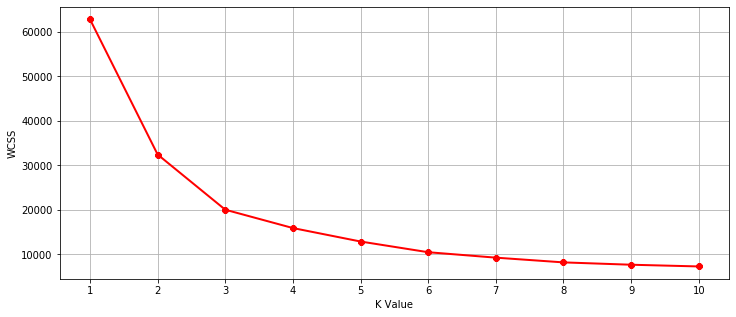

In [30]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_fit.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_fit.iloc[:,1:]) # use 5 as cluster number hyperparameter
df_fit["label"] = kmeans.predict(df_fit.iloc[:,1:])
data["label"] = kmeans.predict(df_fit.iloc[:,1:])

In [33]:
data.head()

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score,published_year,published_month,label
1,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592,2020,11,3
2,33202341,Associations of the Rate of Change in Geriatri...,Depression is considered a psychological risk ...,Copyright © 2020. Published by Elsevier B.V.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Zuo-Teng',...","[""Alzheimer's disease"", 'Geriatric Depression ...",journal of affective disorders,NaN,NaN,Higher rate of increase in GDS was associated ...,1992.0,"32,869",3.892,0.05592,2020,11,3
3,33202257,Proteolytic cleavage of proBDNF to mBDNF in ne...,Brain-derived neurotrophic factor (BDNF) is in...,Copyright © 2020. Published by Elsevier Inc.,2020-11-18,"[{'lastname': 'Wang', 'firstname': 'Mingyue', ...","['Brain-derived neurotrophic factor', 'Neurode...",brain research bulletin,NaN,NaN,NaN,2661.0,"9,714",3.37,0.00792,2020,11,3
7,33200713,C-terminus of Hsp70 Interacting Protein (CHIP)...,Neurodegenerative diseases are characterized b...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Mylvaganam', 'firstname': 'Siva...","[""Alzheimer's disease"", 'Huntington disease', ...",current neuropharmacology,NaN,NaN,NaN,1363.0,"4,178",4.668,0.00628,2020,11,3
8,33200694,The Potential Clinical Properties of Magnesium.,A significant percentage of costs in pharmaceu...,Copyright© Bentham Science Publishers; For any...,2020-11-18,"[{'lastname': 'Crisponi', 'firstname': 'Guido'...",['Magnesium; Diabetes; Depression; Hypertensio...,current medicinal chemistry,NaN,NaN,NaN,1712.0,"17,243",4.184,0.01296,2020,11,3


In [38]:
def return_label(df, df1):
    articles = []
    label = df.iloc[0]["label"]
    for i,row in df1.iterrows():
        if row["label"] == label:
            articles.append(row[["pubmed_id","title","journal"]])
    return articles[:10]

In [40]:
return_label(df_fit, data)

[pubmed_id                                             33202341
 title        Associations of the Rate of Change in Geriatri...
 journal                         journal of affective disorders
 Name: 1, dtype: object,
 pubmed_id                                             33202341
 title        Associations of the Rate of Change in Geriatri...
 journal                         journal of affective disorders
 Name: 2, dtype: object,
 pubmed_id                                             33202257
 title        Proteolytic cleavage of proBDNF to mBDNF in ne...
 journal                                brain research bulletin
 Name: 3, dtype: object,
 pubmed_id                                             33200713
 title        C-terminus of Hsp70 Interacting Protein (CHIP)...
 journal                              current neuropharmacology
 Name: 7, dtype: object,
 pubmed_id                                           33200694
 title        The Potential Clinical Properties of Magnesium.
 journal